# HW 04 - Applied ML

In [480]:
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
%matplotlib inline

from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter

from numpy import unravel_index
from sklearn.ensemble import RandomForestClassifier
from sklearn.cross_validation import train_test_split

from sklearn_pandas import DataFrameMapper

In [417]:
df = pd.read_csv('CrowdstormingDataJuly1st.csv', index_col='playerShort')
df.sample(10)

,player,club,leagueCountry,birthday,height,weight,position,games,victories,ties,...,rater2,refNum,refCountry,Alpha_3,meanIAT,nIAT,seIAT,meanExp,nExp,seExp
playerShort,,,,,,,,,,,,,,,,,,,,,
angel-di-maria,Ángel Di María,Real Madrid,Spain,14.02.1988,180.0,70.0,Left Winger,2,0,2,...,0.25,1213,49,ARG,0.379422,1038.0,0.000403,0.632988,1158.0,0.002096
joseph-akpala,Joseph Akpala,Werder Bremen,Germany,24.08.1986,184.0,81.0,Center Forward,1,1,0,...,1.00,2521,64,NLD,0.352920,5952.0,0.000070,0.445679,6121.0,0.000269
sebastian-tyrala,Sebastian Tyrała,SpVgg Greuther Fürth,Germany,22.02.1988,172.0,78.0,Attacking Midfielder,2,1,0,...,0.00,798,8,DEU,0.336628,7749.0,0.000055,0.335967,7974.0,0.000225
jeremie-brechet,Jérémie Bréchet,ESTAC Troyes,France,14.08.1979,186.0,76.0,Center Back,1,0,0,...,0.25,2945,71,NOR,0.340606,4949.0,0.000083,0.692824,5212.0,0.000391
marc-albrighton,Marc Albrighton,Aston Villa,England,18.11.1989,175.0,67.0,Center Midfielder,8,4,2,...,NaN,256,44,ENGL,0.326690,44791.0,0.000010,0.356446,46916.0,0.000037
adrian-colunga,Adrián Colunga,Getafe CF,Spain,17.11.1984,171.0,69.0,Center Forward,7,2,2,...,0.25,2073,3,ESP,0.369894,1785.0,0.000229,0.588297,1897.0,0.001002
guly,Guly,Southampton FC,England,31.12.1981,189.0,79.0,NaN,2,0,1,...,NaN,1706,44,ENGL,0.326690,44791.0,0.000010,0.356446,46916.0,0.000037
sebastien-puygrenier,Sébastien Puygrenier,AS Nancy,France,28.01.1982,186.0,64.0,Center Back,2,0,1,...,0.25,126,7,FRA,0.334684,2882.0,0.000151,0.336101,3011.0,0.000586
james-perch,James Perch,Newcastle United,England,28.09.1985,180.0,72.0,NaN,1,0,0,...,0.50,2721,44,ENGL,0.326690,44791.0,0.000010,0.356446,46916.0,0.000037


In [418]:
# Remove columns with no rating
df = df.dropna(subset=['rater1', 'rater2'])
df['rating'] = df.rater1 + df.rater2

lim = df.drop(['player',
               'club',
               'leagueCountry',
               'birthday',
               'height',
               'weight',
               'position',
               'rater1',
               'rater2',
               'Alpha_3',
               'photoID'], axis=1)

lim.sample(10)

,games,victories,ties,defeats,goals,yellowCards,yellowReds,redCards,refNum,refCountry,meanIAT,nIAT,seIAT,meanExp,nExp,seExp,rating
playerShort,,,,,,,,,,,,,,,,,
emir-spahic,4,2,2,0,1,2,0,0,2961,7,0.334684,2882.0,0.000151,0.336101,3011.0,0.000586,0.50
oscar-serrano,1,1,0,0,0,0,0,0,949,3,0.369894,1785.0,0.000229,0.588297,1897.0,0.001002,0.25
andreas-lambertz,4,3,1,0,0,0,0,0,636,8,0.336628,7749.0,0.000055,0.335967,7974.0,0.000225,0.50
raphael-wolf,1,1,0,0,0,0,0,0,875,8,0.336628,7749.0,0.000055,0.335967,7974.0,0.000225,0.50
jean-christophe-bahebeck,4,2,1,1,0,0,0,0,2619,7,0.334684,2882.0,0.000151,0.336101,3011.0,0.000586,1.75
adrian-mutu,2,1,1,0,1,1,0,0,2987,32,0.345305,1886.0,0.000219,0.377193,1938.0,0.000823,0.50
brandao,1,1,0,0,0,0,0,0,822,31,0.368946,2411.0,0.000173,0.637172,2475.0,0.000913,1.00
robert-tesche,1,0,0,1,0,0,0,0,2867,71,0.340606,4949.0,0.000083,0.692824,5212.0,0.000391,0.25
dani-alves,3,2,0,1,0,0,0,0,94,3,0.369894,1785.0,0.000229,0.588297,1897.0,0.001002,0.75


In [419]:
X = np.asanyarray(lim[[column for column in lim.columns if column != 'rating']])
y = np.asarray(lim['rating'] * 4, dtype="int")

for col in range(len(X[0])):
    col_mean = np.nanmean(X[:, col])
    X[:, col][np.isnan(X[:, col])] = col_mean

In [420]:
rfc = RandomForestClassifier(
    n_estimators=9,
    criterion='gini',  # or 'entropy' ?
    max_features=None,
    max_depth=5,
)

In [421]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [422]:
rfc.fit(X_train,
        y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=5, max_features=None, max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=9, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [423]:
y_pred = rfc.predict(X_test)
print(sklearn.metrics.accuracy_score(y_test, y_pred))

0.332488124278


In [424]:
rfc.feature_importances_

array([ 0.04208744,  0.04159659,  0.0021197 ,  0.00400763,  0.03450779,
        0.00868451,  0.        ,  0.        ,  0.02900186,  0.12090791,
        0.02183828,  0.02568903,  0.20751028,  0.23910227,  0.00315101,
        0.2197957 ])

In [425]:
sdf = df.reset_index().groupby('playerShort')

In [426]:
feature_function_mapper = {
    'height': np.average,
    'weight': np.average,
    'victories': np.sum,
    'ties': np.sum,
    'defeats': np.sum,
    'goals': np.sum,
    'yellowCards': np.sum,
    'yellowReds': np.sum,
    'redCards': np.sum,
    'rating': np.average,
    'meanIAT': np.average,
    'nIAT': np.average,
    'seIAT': lambda x: np.sqrt(np.average(np.square(x))),
    'meanExp': np.average,
    'nExp': np.average,
    'seExp': lambda x: np.sqrt(np.average(np.square(x))),
} # meanIAT	nIAT	seIAT	meanExp	nExp	seExp

sdf_agg = sdf.agg(feature_function_mapper)
sdf_agg

,meanIAT,rating,nIAT,goals,victories,redCards,ties,meanExp,seExp,seIAT,defeats,yellowCards,weight,height,nExp,yellowReds
playerShort,,,,,,,,,,,,,,,,
aaron-hughes,0.346459,0.25,19710.156627,9,247,0,179,0.494575,0.027536,0.003315,228,19,71.0,182.0,20637.277108,0
aaron-hunt,0.348818,0.25,26104.292929,62,141,1,73,0.449220,0.002506,0.000543,122,42,73.0,183.0,26864.454545,0
aaron-lennon,0.345893,0.50,21234.861386,31,200,0,97,0.491482,0.008914,0.001268,115,11,63.0,165.0,22238.742574,0
aaron-ramsey,0.346821,0.00,38285.826923,39,150,1,42,0.514693,0.104541,0.028116,68,31,76.0,178.0,39719.980769,0
abdelhamid-el-kaoutari,0.331600,0.50,2832.351351,1,41,2,40,0.335587,0.023426,0.006309,43,8,73.0,180.0,2953.837838,4
abdou-traore_2,0.320079,1.50,4523.666667,3,41,0,23,0.296562,0.029404,0.012160,33,11,74.0,180.0,4741.404762,1
abdoulaye-diallo_2,0.341625,1.75,2646.700000,0,8,0,8,0.400818,0.001499,0.000353,8,0,80.0,189.0,2762.500000,0
abdoulaye-keita_2,0.355406,1.75,1728.000000,0,0,0,1,0.417225,0.002139,0.000516,2,0,83.0,188.0,1808.500000,0
abdoulwhaid-sissoko,0.348178,2.00,2470.196429,3,34,2,25,0.429630,0.000771,0.000184,62,21,68.0,180.0,2593.214286,0


In [585]:
X = np.asanyarray(sdf_agg[[column for column in sdf_agg.columns if column != 'rating']])
y = np.asarray(sdf_agg['rating'] * 4, dtype="int")

for col in range(len(X[0])):
    col_mean = np.nanmean(X[:, col])
    X[:, col][np.isnan(X[:, col])] = col_mean

In [586]:
#Max features for RFC is 15 since rating feature is in y and the remaining 15 features are in X
rfc = RandomForestClassifier(
    n_estimators=9,
    criterion='gini',  # or 'entropy' ?
    max_features=15,
    max_depth=2,
)

In [587]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [588]:
rfc.fit(X_train,
        y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=2, max_features=15, max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=9, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [589]:
y_pred = rfc.predict(X_test)
y_compare = rfc.predict(X_train)
print(sklearn.metrics.accuracy_score(y_test, y_pred), sklearn.metrics.accuracy_score(y_train, y_compare))

0.327455919395 0.356902356902


In [569]:
rfc.feature_importances_

array([ 0.17698944,  0.01585536,  0.        ,  0.0690337 ,  0.        ,
        0.06736881,  0.15983034,  0.21168598,  0.18765448,  0.        ,
        0.02730369,  0.        ,  0.        ,  0.0842782 ,  0.        ])

Cross Validation

In [490]:
from sklearn.cross_validation import cross_val_score

scores = np.mean(cross_val_score(rfc, X, y, cv = 10))

In [491]:
print(scores)

0.33013979187


In [492]:
print(sdf_agg.shape)

(1585, 16)


In [679]:
def RandomForestClassifier_CrossValidation(n_estimators_max, n_features_max, max_depth):

    max_k_scores = np.zeros(shape=(n_estimators_max, n_features_max))
    max_k = np.zeros(shape=(n_estimators_max, n_features_max))

    n_estimators_range = range(1,n_estimators_max+1)
    max_features_range = range(1,n_features_max+1)
    max_depth_range = range(1,max_depth)


    #loop over number of estimators
    for i in n_estimators_range:
        print("n_estimators = {}".format(i))
        #loop over max number of features
        for j in max_features_range:
            #loop over max depth
            k_scores = []
            for k in max_depth_range:
                rfc = RandomForestClassifier(
                    n_estimators=i,
                    criterion='gini',  # or 'entropy' ?
                    max_features=j,
                    max_depth=k,
                )
                scores = np.mean(cross_val_score(rfc, X, y, cv = 10))
                k_scores.append(scores.mean())

            max_k_scores[i-1][j-1]=np.max(k_scores)
            max_k[i-1][j-1]=np.argmax(k_scores)

            
    #Find coordinates of max score and print
    x_max, y_max = unravel_index(np.argmax(max_k_scores), max_k_scores.shape)
    print(max_k_scores)
    print(max_k)
    print("max score : {}, ({},{}), k = {}".format(max_k_scores[x_max][y_max], x_max+1, y_max+1, max_k[x_max][y_max]))
    
    best_n_estimators, best_max_features, best_max_depth = x_max+1, y_max+1, max_k[x_max][y_max]
    
    #Plotting
    fig = plt.figure()
    ax = fig.gca(projection='3d')
    X_plot = np.arange(0, n_features_max, 1)
    Y_plot = np.arange(0, n_estimators_max, 1)

    Z_plot = max_k_scores
    X_plot, Y_plot = np.meshgrid(X_plot, Y_plot)

    surf = ax.plot_surface(X_plot, Y_plot, Z_plot, rstride=1, cstride=1, cmap=cm.coolwarm,
                           linewidth=0, antialiased=False)

    fig.colorbar(surf, shrink=0.5, aspect=5)

    plt.show()
    
    return best_n_estimators, best_max_features, best_max_depth, max_k_scores

n_estimators = 1
n_estimators = 2
n_estimators = 3
n_estimators = 4
n_estimators = 5
n_estimators = 6
n_estimators = 7
n_estimators = 8
n_estimators = 9
[[ 0.31981507  0.30974773  0.30478235  0.31023762  0.32002771  0.32701936
   0.31283564  0.31865     0.32668061  0.31619329  0.32193212  0.31680404
   0.3140828   0.32446424  0.31198297]
 [ 0.30968768  0.32063203  0.3205201   0.32616911  0.32316313  0.3199514
   0.32302715  0.30980531  0.3255235   0.32244754  0.33205964  0.32192946
   0.32581218  0.31950651  0.32496988]
 [ 0.31172786  0.32581144  0.32066346  0.3192522   0.3274681   0.32275353
   0.3328014   0.32791105  0.32852021  0.32044944  0.32371021  0.33514518
   0.32685297  0.33753172  0.32830305]
 [ 0.3153912   0.3295204   0.32120721  0.32307103  0.33489667  0.32805832
   0.32876173  0.32837623  0.33511668  0.33193971  0.32255589  0.34016159
   0.33258846  0.32449228  0.33211576]
 [ 0.31837744  0.32183935  0.32354485  0.32844423  0.3337781   0.33180454
   0.32698901  0.33648634 

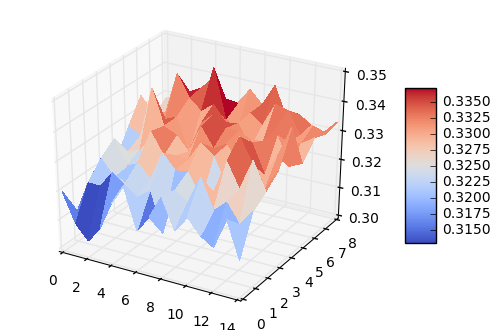

In [680]:
#Run cross validation to find optimal parameters for RFC
best_n_estimators, best_max_features, best_max_depth, max_scores = RandomForestClassifier_CrossValidation(9, len(X[0]), 20)

3D array 

In [687]:
rfc = RandomForestClassifier(
    n_estimators=best_n_estimators,
    criterion='gini',  # or 'entropy' ?
    max_features=best_max_features,
    max_depth=best_max_depth,
)

In [688]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [689]:
rfc.fit(X_train,
        y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=3.0, max_features=6, max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=8, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [690]:
y_pred = rfc.predict(X_test)
y_compare = rfc.predict(X_train)
print(sklearn.metrics.accuracy_score(y_test, y_pred), sklearn.metrics.accuracy_score(y_train, y_compare))

0.340050377834 0.360269360269


In [691]:
rfc.feature_importances_

array([ 0.09626615,  0.0529052 ,  0.06442236,  0.05156855,  0.        ,
        0.13854761,  0.07392482,  0.13237092,  0.17173722,  0.03101289,
        0.08701368,  0.03425626,  0.04009678,  0.01516215,  0.01071542])